In [16]:
#creating and debugging threshold function
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import nana

In [18]:
search_result = lk.search_lightcurve('KIC 5202905', mission='Kepler')
lc_collection = search_result.download_all()

In [45]:
#create a delta f (1/tmax-min aka 1/total observation time
#delta_f = 1/lc.time[-1] - lc.time[0] #this is in days
total_observation_time = lc.time[-1] - lc.time[0]
print(total_observation_time)
delta_f = (1/total_observation_time).value
print(delta_f)

1470.4622572100852
0.0006800582572566702


In [47]:
#find total observation time, use it to find minimum frequency
total_observation_time = lc.time[-1] - lc.time[0] # in days
f_min = f_min = 1/ total_observation_time # in days
f_min_no_units = f_min.value #strip units (but are in 1/days)
print(f_min_no_units)
print(type(f_min_no_units))

0.0006800582572566702
<class 'numpy.float64'>


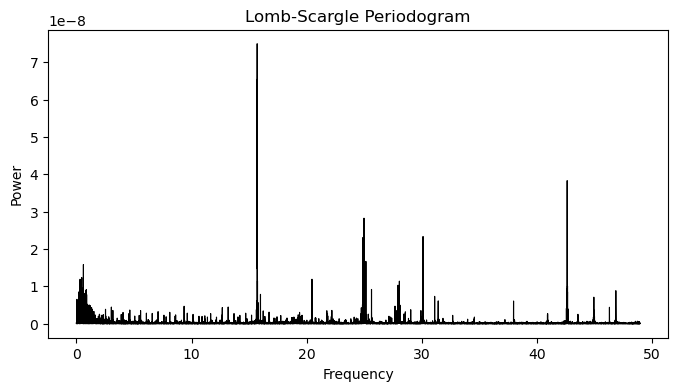

In [49]:
#trying to create periodograms of spacing f_min
frequency_grid = np.arange(f_min_no_units, f_max_no_units, f_min_no_units) #spacing with increments of f_min, starting with f_min_no_units to avoid di

#create periodogram only to get values in order to remove units
pg_spacing_fmin = lc.to_periodogram(
    method='lombscargle',
    normalization='psd',
    frequency=frequency_grid  # Unitless frequency grid
)

freq_values = np.array(pg_spacing_fmin.frequency.value)  # Remove units, use this later in get_started function as x values
power_values = np.array(pg_spacing_fmin.power.value)  # Remove units, use this later in get_started function as y values

plt.close('all')

plt.figure(figsize=(8, 4))
plt.plot(freq_values, power_values, 'k-', lw=0.8) 
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram")

plt.show()




In [51]:
indices = nana.get_started(100, freq_values, power_values)
print(indices)
print(len(indices))

[23088 23103 62667 36727 44265 36563 36970   904   690 30084   475 23129
 41244 41069 62709   714 62618 37686  1276 68880  1194   429   287   892
   524  1098 23510  1313  1289  1135 45748 66073  1241   538    81   821
   775 23062 46204 55821   857   344 23038 30101 23199  1181   728 36824
   940  1337   368 36536   303  1666  1490   489 41320 23152   565  1764
 40684 13759 62682 46189 19386  4473 62694  1604 68064 18640  1942 36386
  1168   764 36697 36673   441  1263 62570   403 23073   843   796 62757
 36761   502  2007  3726   750 66038 22990 42691 41259   675  6825 30122
  1408 32622   106  4664]
100


In [53]:
#take the each index of indices and look at the 
print(delta_f)

0.0006800582572566702


In [81]:
def threshold(indices, xs, ys):
    good_peaks = np.array([])
    for i in indices:
        leftside = ys[i-10:i]  
        rightside = ys[i+1:i+11]
        median = np.nanmedian(np.concatenate((leftside,rightside)))
        print("median:", median, ys[i]/median)
        if ys[i] > 5*median:
            good_peaks.append(i)
            print("are you there?")
    return good_peaks

In [83]:
threshold(indices, freq_values, power_values)

median: 2.8467570654329884e-08 2.6345304993899656
median: 2.7753022990342184e-08 2.35989367351569
median: 1.493932949647538e-08 2.5655312633501204
median: 1.5010673581166182e-08 1.8828635826376456
median: 9.952537465897297e-09 2.347338150628621
median: 8.457720329437504e-09 2.72459391196256
median: 7.130446861777936e-09 2.3414472667806883
median: 7.154262837651086e-09 2.214839225237006
median: 3.6208722094954255e-09 3.4149810862190724
median: 5.494071902121797e-09 2.168744331074217
median: 2.5818518780472667e-09 4.61234772367776
median: 3.1219550987003366e-09 3.671186823411656
median: 4.344084348651673e-09 2.6243709133995794
median: 3.994754223266267e-09 2.5819630314420974
median: 3.3984335552195197e-09 2.972601974734434
median: 3.142369185474263e-09 3.037871082786032
median: 3.4532870778506928e-09 2.690259011061629
median: 4.422949756155295e-09 2.076282383723074
median: 2.0117029869409396e-09 4.54777523137546
median: 5.8693797302798345e-09 1.50868033706495
median: 2.6258585631076548e-

array([], dtype=float64)

In [93]:
#23088
peak = power_values[23088]
print("peak:", peak)
leftside = power_values[23088-10:23088]  
rightside = power_values[23088+1:23088+11]
print("leftside:", leftside)
print("rightside:", rightside)
median = np.nanmedian(np.concatenate((leftside,rightside)))
print(median)
        #print("median:", median, ys[i]/median)

peak: 7.499868313237084e-08
leftside: [2.75519014e-11 1.08745506e-09 4.52859136e-09 1.07986382e-08
 1.98773170e-08 3.11941928e-08 4.36552261e-08 5.57845985e-08
 6.59622646e-08 7.27142932e-08]
rightside: [7.24277204e-08 6.53791063e-08 5.49689400e-08 4.28857066e-08
 3.11111453e-08 2.15769874e-08 1.58217732e-08 1.47151627e-08
 1.83058155e-08 2.58239960e-08]
2.8467570654329884e-08


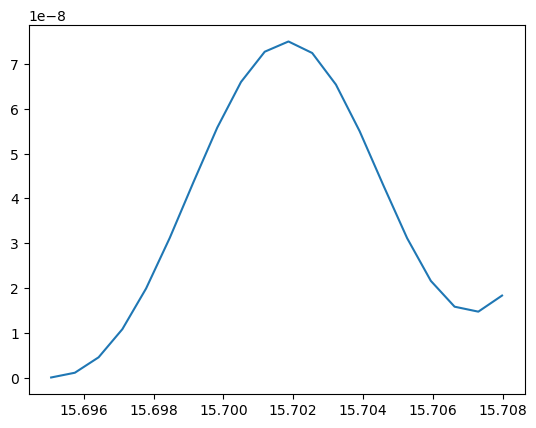

In [97]:
plt.plot(freq_values[23088-10:23088+10], power_values[23088-10:23088+10])

In [99]:
print(delta_f)

0.0006800582572566702


In [101]:
freq_values[100]-freq_values[99]

0.0006800582572566716

In [110]:
#trying new star
#KIC_7917485
search_result2 = lk.search_lightcurve('KIC 7917485', mission='Kepler')
lc_collection2 = search_result2.download_all()


In [112]:
lc2 = lc_collection2.stitch()  # Combine all light curves in lc_collection
sampling_rate_days= np.median(np.diff(lc.time))
sampling_rate_days_no_units = sampling_rate_days.value #get rid of units
f_max = 1 / (sampling_rate_days) #in days
f_max_no_units = f_max.value #get rid of units (but it's actually in 1/days)

#print(sampling_rate_days_no_units)
#print(f_max_no_units)
#print(sampling_rate_days)


In [113]:
total_observation_time2 = lc2.time[-1] - lc2.time[0]
print(total_observation_time2)
fmin2 = 1/total_observation_time2
fmin2_nounits = fmin2.value
frequency_grid2 = np.arange(fmin2_nounits, f_max_no_units, fmin2_nounits) #spacing with increments of f_min, starting with f_min_no_units to avoid di


1470.4623264496477


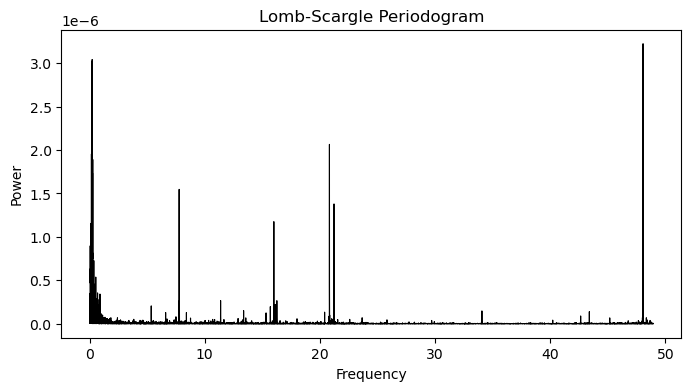

In [116]:
pg_spacing_fmin2 = lc2.to_periodogram(
    method='lombscargle',
    normalization='psd',
    frequency=frequency_grid2  # Unitless frequency grid
)

freq_values2 = np.array(pg_spacing_fmin2.frequency.value)  # Remove units, use this later in get_started function as x values
power_values2 = np.array(pg_spacing_fmin2.power.value)  # Remove units, use this later in get_started function as y values

plt.close('all')

plt.figure(figsize=(8, 4))
plt.plot(freq_values2, power_values2, 'k-', lw=0.8) 
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram")

plt.show()

In [118]:
indices = nana.get_started(100, freq_values2, power_values2)

In [122]:
good_peaks2 = threshold(indices, freq_values2, power_values2)

median: 1.4961474222207857e-06 2.154789842523205
median: 1.7390228872795547e-06 1.7491272908140925
median: 1.7097495249033416e-06 1.7620866238845219
median: 1.2057229055966548e-06 1.8302582817651423
median: 9.296927773298978e-07 2.2210332876373533
median: 8.583263518834067e-07 2.2773489704265555
median: 8.299806001670218e-07 2.278224988506654
median: 7.687149500203679e-07 2.2551812599606684
median: 6.480809828007404e-07 2.386930385042824
median: 6.154413565012389e-07 2.2410109569923193
median: 7.418379064575139e-07 1.6277221156030748
median: 5.575720907831336e-07 2.108054469695478
median: 7.749759835595038e-07 1.4913916632293749
median: 3.9104253665118615e-07 2.486644975302551
median: 6.10622581636807e-07 1.520804746966265
median: 7.02915848864468e-07 1.275940211584888
median: 7.573961462591841e-07 1.0763361431376883
median: 3.3623092478511855e-07 2.1608087725620955
median: 5.429298432890117e-07 1.316161668857573
median: 5.074989261401262e-07 1.25002067116563
median: 3.9819424545919714

In [125]:
print(good_peaks2)

[]
